In [2]:
# ----- IMPORTACION DE LIBRERIAS -----
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

In [3]:
# ----- NOMBRE DE LAS IMAGENES DE PRUEBA -----
foto1 = "carretera.jpg"
foto2 = "image-cell.png"
foto3 = "person_bacteria.jpeg"



# https://www.ripublication.com/ijaerdoi/2015/ijaerv10n9_20.pdf
# https://www.researchgate.net/profile/Can-Eyupoglu/publication/315751159_Implementation_of_Bernsen's_Locally_Adaptive_Binarization_Method_for_Gray_Scale_Images/links/58e20d33aca272059ab08e6c/Implementation-of-Bernsens-Locally-Adaptive-Binarization-Method-for-Gray-Scale-Images.pdf
# https://es.slideshare.net/JorgeAntonioParraSerquen/segmentacin-por-umbralizacin-mtodo-de-otsu

# Umbralizacion global

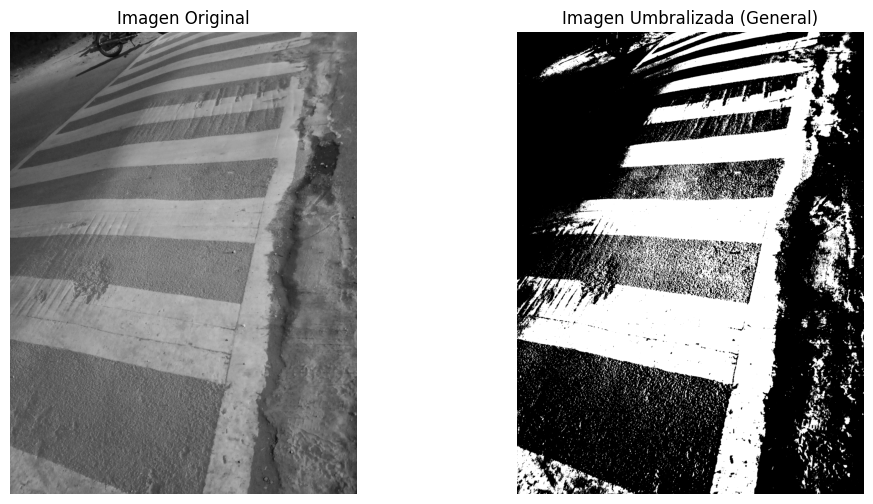

In [26]:
def umbralizacionGlobal(imagen, umbral):
     filas, columnas = imagen.shape
     imagen = np.array(imagen)     # convierte la imagen a arreglo


     for x in range(filas):
          for y in range(columnas):
               if imagen[x, y] > umbral:
                    imagen[x, y] = 255  # lo pone en blanco
               else:
                    imagen[x, y] = 0    # lo pone en negro
                    
     return imagen

# ----- LLAMADO DE LAS FUNCIONES -----
imagen = cv2.imread(foto1,0)  # lee la imagen en escala de grises

Uglobal = umbralizacionGlobal(imagen,120)    # llama a la funcion con un umbral n

imgGlobal = Image.fromarray(Uglobal)    # pasa el arreglo a imagen

# Muestra la imagen original y la imagen umbralizada
# ---- imagen 1 ------
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgGlobal, cmap='gray')
plt.title('Imagen Umbralizada (General)')
plt.axis('off')

plt.show()


# Umbralización global por el método de Otsu

Otsu:  171


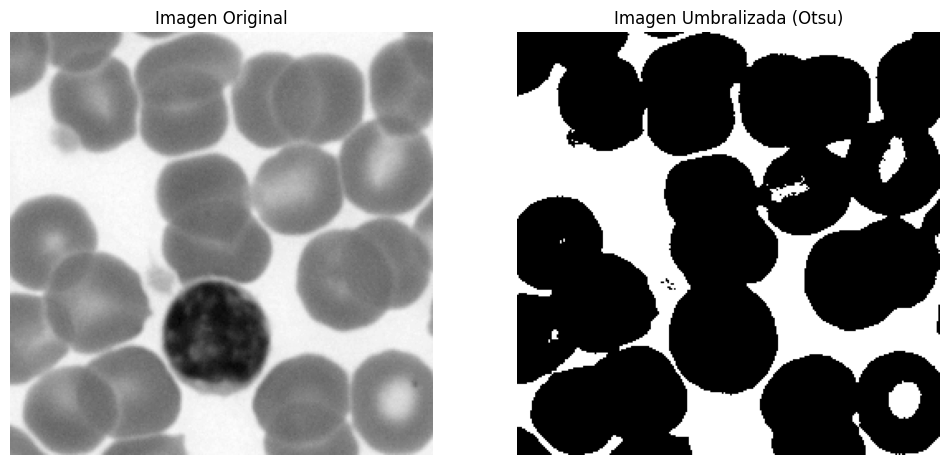

In [28]:
def umbralizacionOtsu(imagen):
    # calcular el histograma
    histograma = np.zeros(256)
    filas, columnas = imagen.shape

    # Realiza el histograma de la imagen
    for x in range(filas):
        for y in range(columnas):
            intensidad = imagen[x, y]
            histograma[intensidad] += 1

    # normalizar el histograma
    histograma = histograma / (filas * columnas)
  
    aux = 0
    final = 0

    # encontrar el umbral optimo
    for umbral in range(1, 256):
        # Calcular w1, w2
        w1 = np.sum(histograma[:umbral])    # suma de 0 al umbral
        w2 = np.sum(histograma[umbral:])    # suma del umbral al final

        if w1 == 0 or w2 == 0:
            continue

        # Calcular x1, x2
        x1 = np.sum(np.arange(umbral) * histograma[:umbral]) / w1
        x2 = np.sum(np.arange(umbral, 256) * histograma[umbral:]) / w2

        #Calcular varianza entre clases
        varianza = w1 * w2 * ((x1 - x2) ** 2)

        if varianza > aux:
            aux = varianza
            final = umbral

    # Paso 5: Aplicar el umbral óptimo
    imagen_binaria = (imagen > final) * 255

    print("Otsu: ", final)

    return imagen_binaria


# ----- LLAMADO DE LAS FUNCIONES -----
imagen = cv2.imread(foto2, 0)   # lee la imagen en escala de grises

otsu = umbralizacionOtsu(imagen)  # guarda la imagen que resulta de ostu

imgOtsu = Image.fromarray(otsu)    # pasa el arreglo a imagen

# Muestra la imagen original y la imagen umbralizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgOtsu, cmap='gray')
plt.title('Imagen Umbralizada (Otsu)')
plt.axis('off')

plt.show()


# Umbralización local adaptativa por el método de Bernsen

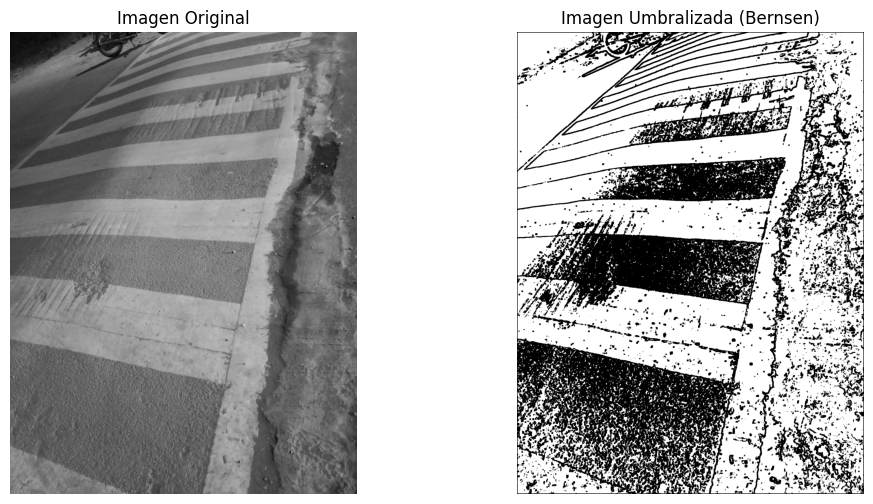

In [30]:
def umbralizacion_bernsen(imagen, kernel, umbral):
    filas, columnas = imagen.shape  
    resultado = np.zeros_like(imagen)   # hace una matriz de 0 del tamaño de la imagen

    radio = kernel // 2    # hace una division con un resultado entero para saber el radio del kernel

    for x in range(radio, filas - radio): # se hace la convolucion de la ventana
        for y in range(radio, columnas - radio):
            ventana = imagen[x - radio:x + radio + 1,
                             y - radio:y + radio + 1]
            
            min_pixel = np.min(ventana) # obtiene el minimo pixel 
            max_pixel = np.max(ventana) # obtiene el maximo pixel 

            if max_pixel - min_pixel <= umbral: # si la suma de ellos es menor al umbral...
                resultado[x, y] = 255
            else:
                resultado[x, y] = 0

    return resultado


# ----- LLAMADO DE LAS FUNCIONES -----
imagen = cv2.imread(foto1,0)    # lee la imagen en escala de grises
imagen = np.array(imagen)   # convierte la imagen a arreglo

kernel = 11 # Tamaño de la ventana 
umbral = 30  # Umbral minimod de los vecinos
imagen_umbralizada = umbralizacion_bernsen(imagen, kernel, umbral)

# Muestra la imagen original y la imagen umbralizada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Imagen Umbralizada (Bernsen)')
plt.axis('off')

plt.show()